# **Projet : Modélisation du Comportement des Attaquants avec le Machine Learning**

# **I. Aperçu du jeu de données, incluant ses caractéristiques, l’analyse exploratoire, le prétraitement des données, et les performances des différents modèles.**

## **1. Présentation du Dataset et lien avec le projet**
Le dataset CIC-IDS2017 a été spécialement conçu par le Canadian Institute for Cybersecurity pour fournir des données réalistes sur le trafic réseau, à des fins de recherche en cybersécurité. Il simule des activités normales et malveillantes dans un environnement réseau contrôlé.

Pour notre projet, ce dataset est parfaitement adapté, car il permet de modéliser différentes phases du comportement d’un attaquant, telles que :

- **Reconnaissance** (PortScan),

- **Brute Force Login** (SSH, FTP),

- **Attaques Web** (XSS, SQLi),

- **Infiltration ou exfiltration de données**.

Ces comportements représentent les étapes initiales d’une cyberattaque, que nous cherchons à détecter automatiquement à l’aide du Machine Learning.

## **2. Caractéristiques du Dataset**
- **Volume :** plus de 2,8 millions de lignes.

- **Colonnes :** 79 au total, dont :

  - **78 variables numériques** (durée de session, nombre de paquets, flags TCP, etc.),

  - **1 colonne 'Label'** indiquant le type de trafic (Benign ou type d'attaque).

- **Attaques couvertes :**

BruteForce, PortScan, DoS, Heartbleed, Botnet, Web Attack, Infiltration…

- **Problème majeur : déséquilibre important**; la majorité des enregistrements sont "Benign" (trafic normal), ce qui peut biaiser les modèles si on ne traite pas ce déséquilibre.

- Intérêt pour notre projet : Ces données représentent concrètement le comportement réseau observable d’un attaquant. À partir de ces observations, on peut créer un modèle capable de reconnaître automatiquement un comportement anormal ou malveillant.

## **3. Analyse exploratoire (EDA)**
Avant d’entraîner nos modèles, nous avons procédé à une analyse exploratoire des données :

- **Doublons :** Plus de 300 000 lignes dupliquées détectées, ce qui peut fausser l’apprentissage.

- **Valeurs manquantes/infinies :** Deux colonnes importantes (`Flow Bytes/s` et `Flow Packets/s`) contiennent des valeurs infinies ou absentes, mais en faible proportion (0,06 %).

- **Corrélations :** Certaines variables sont très fortement corrélées, ce qui peut provoquer des problèmes de redondance (multicolinéarité) dans les modèles.

- **Lien avec notre projet :** L’analyse EDA nous permet de comprendre comment les attaquants interagissent avec le réseau (ex. : nombre élevé de connexions dans un port scan) et d’identifier des variables clés à utiliser dans les modèles.

## **4. Prétraitement des données**
Afin de préparer les données pour l’apprentissage automatique, nous avons appliqué les étapes suivantes :

- **Suppression des doublons**,

- **Remplacement des valeurs infinies par NaN**,

- **Imputation des valeurs manquantes par la médiane**,

- **Réduction de la mémoire** par conversion des types de données numériques (downcasting),

- **Échantillonnage** (20 %) pour travailler avec un sous-ensemble représentatif.

Ces étapes sont essentielles pour garantir la stabilité et l'efficacité de l'entraînement, surtout avec un ordinateur personnel ou des ressources limitées.



## **5. Réduction de dimension : PCA**
Le dataset contient plus de 70 variables. Pour éviter un surcoût computationnel et améliorer la performance des modèles, nous avons utilisé une **PCA (Analyse en Composantes Principales)** :

- Standardisation préalable des données avec `StandardScaler`,

- Réduction progressive en ajustant le nombre de composantes,

- Suivi du ratio de variance expliquée pour ne pas perdre trop d’information.

Dans notre contexte, cela revient à condenser les comportements observés d’un **attaquant** dans un espace plus petit mais représentatif.

## **6. Modèles de Machine Learning appliqués**
Nous avons testé deux types d’approches :

**A. Classification binaire**
>Objectif : différencier le trafic normal du trafic malveillant.

- Modèles utilisés :

  - Régression Logistique

  - SVM (Support Vector Machine)

**B. Classification multi-classe**
>Objectif : identifier le type d’attaque (ex. : PortScan, BruteForce).

- Modèles utilisés :

  - **Random Forest**

  - **Arbre de Décision**

  - **KNN (K-Nearest Neighbors)**

Pour équilibrer les classes, nous avons appliqué des techniques de rééchantillonnage (undersampling ou oversampling selon les cas).


## **7. Évaluation des performances**
Chaque modèle a été évalué avec plusieurs métriques :

- **Accuracy :** taux de bonne prédiction,

- **Recall :** capacité à identifier les attaques,

- **F1-score :** équilibre entre précision et rappel,

- **Matrice de confusion :** visualisation des erreurs.

Cette étape nous a permis de comparer objectivement les modèles et de choisir ceux qui modélisent le mieux le comportement des attaquants.

# **II. Caractéristiques du jeu de données et analyse exploratoire des données**

## **1. Chargement, visualisation des données et analyse des lignes et colonnes**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Chargement du jeu de données
chemin_dossier = "/content/drive/MyDrive/Colab Notebooks/ENSET's Project/dataset"
liste_fichiers = os.listdir(chemin_dossier)

dataframes = []

for fichier in liste_fichiers:
    if fichier.endswith(".csv"):
        chemin_complet = os.path.join(chemin_dossier, fichier)
        df = pd.read_csv(chemin_complet)
        dataframes.append(df)

df_total = pd.concat(dataframes, ignore_index=True)

In [4]:
lignes, colonnes = df_total.shape

print('Nouvelle dimension :')
print(f'Nombre de lignes : {lignes}')
print(f'Nombre de colonnes : {colonnes}')
print(f'Nombre total de cellules : {lignes * colonnes}')

Nouvelle dimension :
Nombre de lignes : 2830743
Nombre de colonnes : 79
Nombre total de cellules : 223628697


In [5]:
# Renommer les colonnes en supprimant les espaces avant et après le nom des colonnes
col_names = {col: col.strip() for col in df_total.columns}
df_total.rename(columns = col_names, inplace = True)

In [6]:
df_total.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [7]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [8]:
df_total.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
pd.options.display.max_rows = 80

print('Aperçu des colonnes :')
df_total.describe().transpose()

Aperçu des colonnes :


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


## **2. Nettoyage des données**

In [10]:
# Identification des valeurs dupliquées
dup_valeurs = df_total[df_total.duplicated()]
print(f'Nombre de doublons : {len(dup_valeurs)}')

Nombre de doublons : 308381


In [11]:
df_total.drop_duplicates(inplace=True)
print(f'La Nouvelle dimension : {df_total.shape}')
print(f'Le nouveau nombre de doublons : {len(df_total[df_total.duplicated()])}')

La Nouvelle dimension : (2522362, 79)
Le nouveau nombre de doublons : 0


In [12]:
# Identification des valeurs manquantes

missing_val = df_total.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [13]:
# Vérification des valeurs infinies

numeric_cols = df_total.select_dtypes(include=np.number).columns
inf_count = np.isinf(df_total[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [14]:
# Remplacement des valeurs infinies par NaN (valeurs manquantes)

print(f'Valeurs manquantes initiales : {df_total.isna().sum().sum()}')
df_total.replace([np.inf, -np.inf], np.nan, inplace=True)
print(f'Valeurs manquantes après traitement des valeurs infinies : {df_total.isna().sum().sum()}')


Valeurs manquantes initiales : 353
Valeurs manquantes après traitement des valeurs infinies : 3128


In [15]:
# Afficher les colonnes avec valeurs manquantes

missing = df_total.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [16]:
# Calcul du pourcentage de valeurs manquantes

mis_per = (missing / len(df_total)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis=1)
mis_table = mis_table.rename(columns={0: 'Valeurs manquantes', 1: 'Pourcentage du total'})
print(mis_table.loc[mis_per > 0])

                Valeurs manquantes  Pourcentage du total
Flow Bytes/s                  1564                  0.06
Flow Packets/s                1564                  0.06


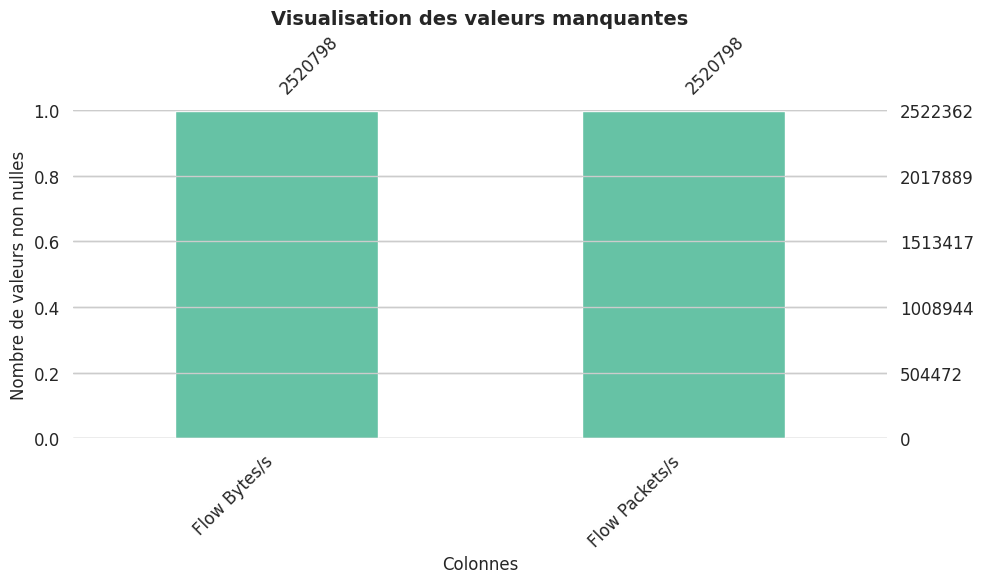

In [17]:
# Visualisation des valeurs manquantes
import missingno as msno

sns.set_theme(style="whitegrid")

colonnes_manquantes = [col for col in df_total.columns if df_total[col].isna().any()]

fig_width = max(10, len(colonnes_manquantes) * 0.4)
fig, ax = plt.subplots(figsize=(fig_width, 6))

msno.bar(
    df_total[colonnes_manquantes],
    ax=ax,
    fontsize=12,
    color=sns.color_palette("Set2")[0],
    sort="ascending"
)

ax.set_title("Visualisation des valeurs manquantes", fontsize=14, fontweight='bold')
ax.set_xlabel("Colonnes", fontsize=12)
ax.set_ylabel("Nombre de valeurs non nulles", fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Traitement des valeurs manquantes (Colonnes contenant des données manquantes)
# Calcul de la médiane pour les colonnes contenant des valeurs manquantes

med_flow_bytes = df_total['Flow Bytes/s'].median()
med_flow_packets = df_total['Flow Packets/s'].median()

print("Médiane de 'Flow Bytes/s' :", med_flow_bytes)
print("Médiane de 'Flow Packets/s' :", med_flow_packets)

Médiane de 'Flow Bytes/s' : 3715.0378579999997
Médiane de 'Flow Packets/s' : 69.742244285


In [19]:
# Remplissage des valeurs manquantes avec la médiane

df_total['Flow Bytes/s'] = df_total['Flow Bytes/s'].fillna(med_flow_bytes)
df_total['Flow Packets/s'] = df_total['Flow Packets/s'].fillna(med_flow_packets)

In [20]:
# Vérification que toutes les valeurs manquantes ont bien été traitées

print("Nombre de valeurs manquantes dans 'Flow Bytes/s' :", df_total['Flow Bytes/s'].isna().sum())
print("Nombre de valeurs manquantes dans 'Flow Packets/s' :", df_total['Flow Packets/s'].isna().sum())

Nombre de valeurs manquantes dans 'Flow Bytes/s' : 0
Nombre de valeurs manquantes dans 'Flow Packets/s' : 0


### **Traitement des Valeurs Manquantes**
1. Identification des Valeurs Manquantes
Les colonnes Flow Bytes/s et Flow Packets/s contiennent des valeurs manquantes dans le jeu de données. Il est essentiel de détecter ces valeurs avant de procéder à leur traitement.

2. Analyse des Distributions des Données
Avant d'imputer les valeurs manquantes, nous analysons la distribution des deux variables. À l'aide de boxplots et d'histogrammes, nous observons que ces variables suivent une distribution non normale et présentent des valeurs extrêmes (outliers).

3. Imputation des Valeurs Manquantes
Pour traiter les valeurs manquantes, nous choisissons d'utiliser la médiane des colonnes concernées. Cette approche est préférable car elle ne perturbe pas la distribution des données et permet de remplacer les valeurs manquantes sans introduire de biais.

4. Vérification Après Traitement
Après avoir imputé les valeurs manquantes avec la médiane, nous vérifions que les colonnes Flow Bytes/s et Flow Packets/s ne contiennent plus de valeurs manquantes.

## **3 Analyse des Modèles à l'aide de Visualisations**
Visualisation de la corrélation des colonnes. De plus, tracé d'une carte de chaleur (Heat Map).

In [21]:
df_total['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [22]:
# Affichage de la répartition des types d'attaques
df_total['Label'].value_counts()

,count
Label,
BENIGN,2096484
DoS Hulk,172849
DDoS,128016
PortScan,90819
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


In [23]:
# Création d'un dictionnaire de mappage des attaques
attaque_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Application du mappage des attaques
df_total['Type d\'Attaque'] = df_total['Label'].map(attaque_map)

In [24]:
# Affichage de la répartition des nouveaux types d'attaques
df_total['Type d\'Attaque'].value_counts()

,count
Type d'Attaque,
BENIGN,2096484
DoS,193748
DDoS,128016
Port Scan,90819
Brute Force,9152
Web Attack,2143
Bot,1953
Infiltration,36
Heartbleed,11


In [25]:
# Suppression de la colonne "Label" après avoir créé la colonne "Type d'Attaque"
df_total.drop('Label', axis=1, inplace=True)

In [26]:
# Encodage des Types d'Attaques avec LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_total['Numéro d\'Attaque'] = le.fit_transform(df_total['Type d\'Attaque'])

print(df_total['Numéro d\'Attaque'].unique())

[0 3 7 1 6 8 2 4 5]


In [27]:
# Affichage des types d'attaques associés à chaque valeur numérique
encoded_values = df_total['Numéro d\'Attaque'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [28]:
corr = df_total.corr(numeric_only=True).round(2)

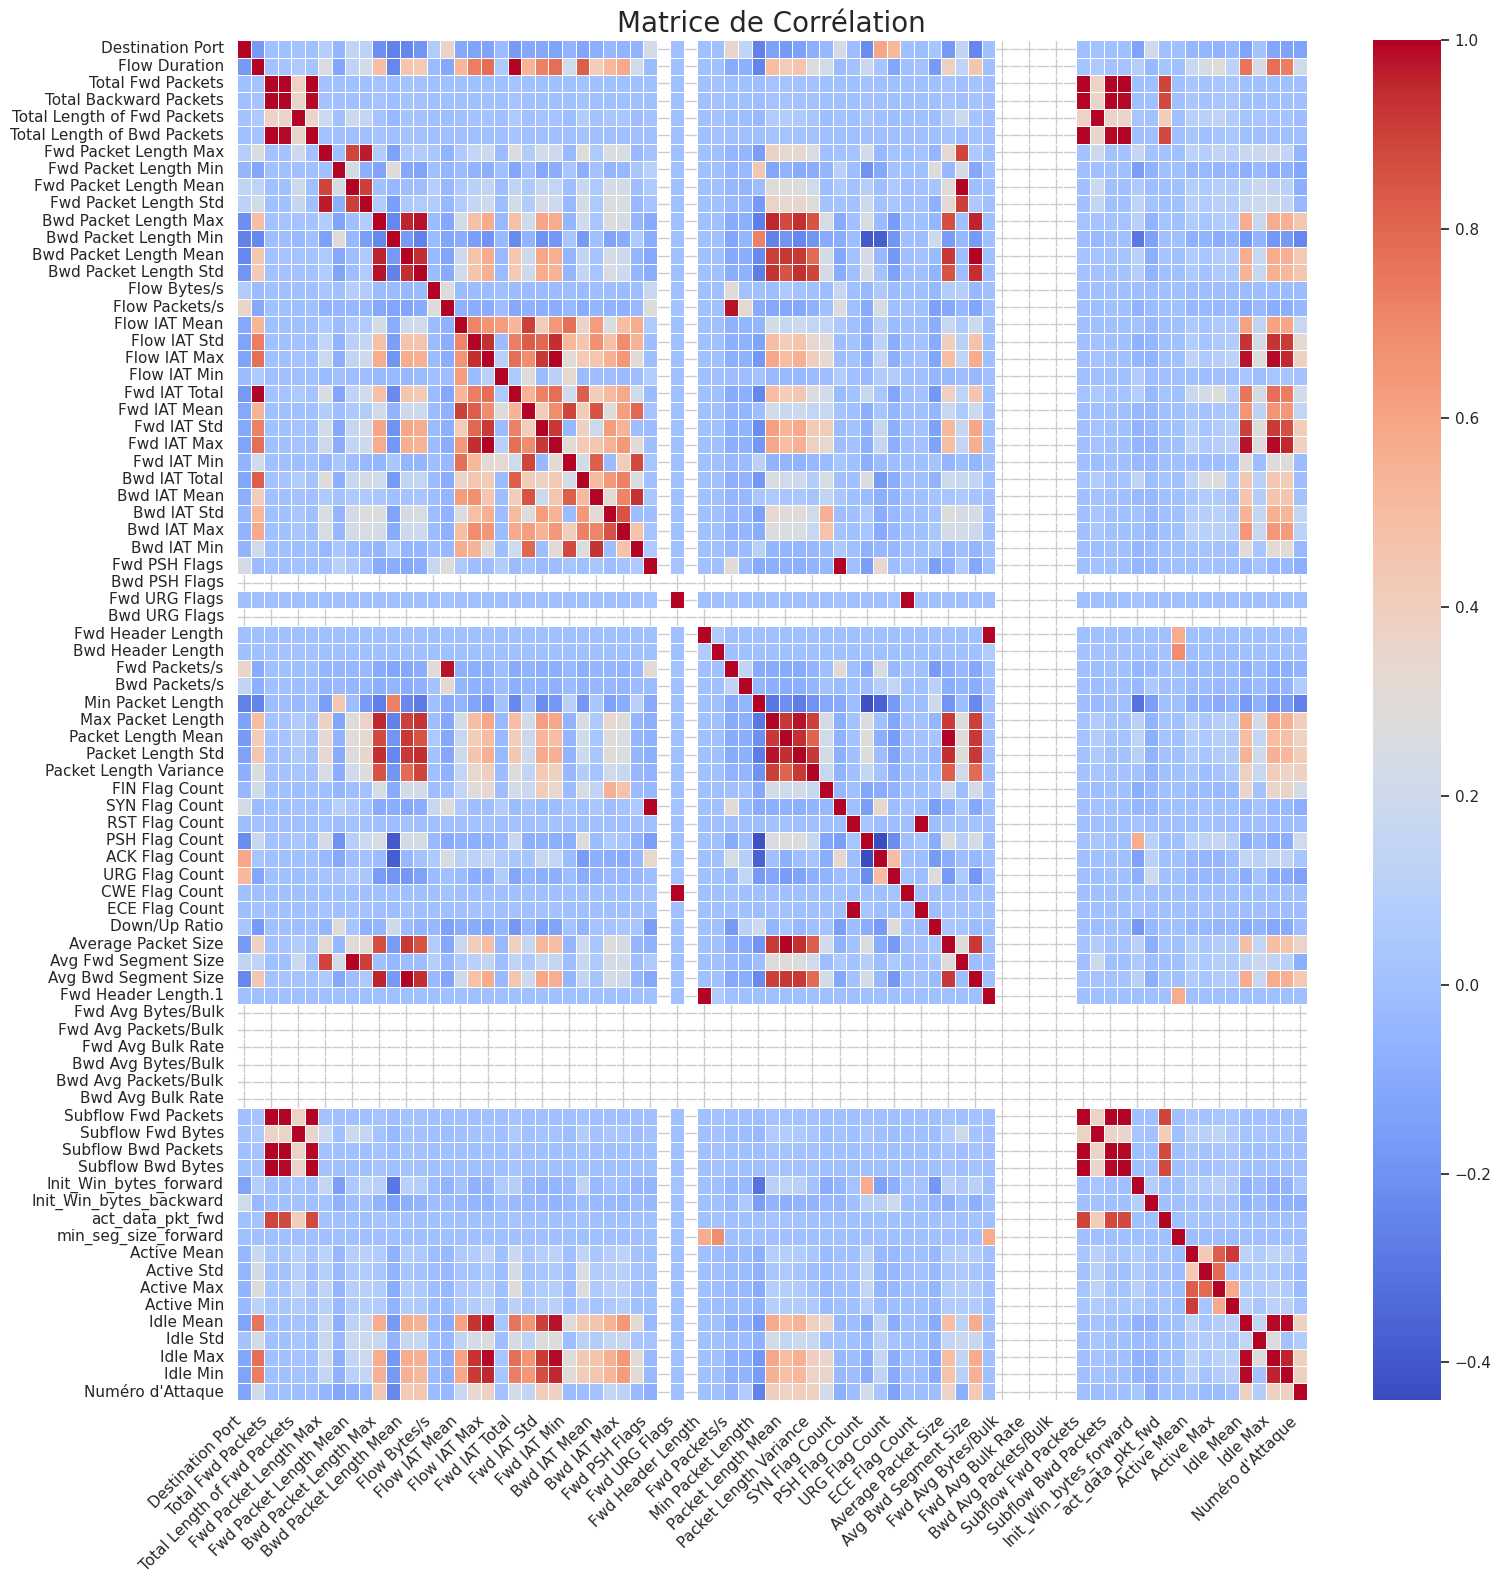

In [29]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidth=0.5)
plt.title('Matrice de Corrélation', fontsize=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [30]:
# Caractéristiques ayant une corrélation positive avec 'Numéro d\'Attaque'
pos_corr_features = corr['Numéro d\'Attaque'][(corr['Numéro d\'Attaque'] > 0) & (corr['Numéro d\'Attaque'] < 1)].index.tolist()

print("Caractéristiques ayant une corrélation positive avec 'Numéro d\'Attaque' :\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Numéro d\'Attaque']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Caractéristiques ayant une corrélation positive avec 'Numéro d'Attaque' :

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean 

In [31]:
print(f'Nombre de caractéristiques considérablement importantes : {len(pos_corr_features)}')

Nombre de caractéristiques considérablement importantes : 32


In [32]:
# Vérification des colonnes avec une écart-type nul (les cases vides dans la heatmap)
std = df_total.std(numeric_only=True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

### **Analyse des Corrélations**
Pour analyser les relations linéaires entre les variables numériques continues, une matrice de corrélation (heatmap) a été générée. Cette visualisation permet d’avoir une vue d’ensemble claire et synthétique des relations entre les différentes caractéristiques du jeu de données.

La heatmap a mis en évidence plusieurs caractéristiques fortement corrélées entre elles, ainsi qu’avec la variable cible (Attack Number). Elle a également permis d’identifier certaines colonnes avec une absence totale de variance (écart-type nul), ce qui les rend inexploitables pour la prédiction.

Il n’a pas été jugé nécessaire de multiplier les visualisations individuelles (telles que pairplot ou regplot) pour chaque paire de variables, car la heatmap fournit déjà les informations essentielles de manière efficace.

Visualisation des relations linéaires entre les colonnes (variables numériques continues)

In [33]:
# 1. Échantillonnage des données (20% du df_totalset)
sample_size = int(0.2 * len(df_total))
sampled_data = df_total.sample(n=sample_size, replace=False, random_state=0)

In [34]:
sampled_data.shape

(504472, 80)

In [35]:
# 2. Comparaison des moyennes entre dataset original et échantillon
numeric_cols = df_total.select_dtypes(include=[np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 90)

for col in numeric_cols:
    old_mean = df_total[col].mean()
    new_mean = sampled_data[col].mean()
    variation = 0 if old_mean == 0 else abs((new_mean - old_mean) / old_mean)
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old_mean, new_mean, variation))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------
Destination Port                8704.762165           8709.619693           0.06%
Flow Duration                   16581323.773163       16664541.182583       0.50%
Total Fwd Packets               10.276271             11.801783             14.84%
Total Backward Packets          11.565964             13.671102             18.20%
Total Length of Fwd Packets     611.575108            609.676051            0.31%
Total Length of Bwd Packets     18133.153930          22797.828210          25.72%
Fwd Packet Length Max           231.091768            233.184968            0.91%
Fwd Packet Length Min           19.194641             19.227202             0.17%
Fwd Packet Length Mean          63.470104             63.967652             0.78%
Fwd Packet Length Std       

In [36]:
# Affichage des valeurs uniques
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33264
2.  Flow Duration                 : 256319
3.  Total Fwd Packets             : 683
4.  Total Backward Packets        : 838
5.  Total Length of Fwd Packets   : 9099
6.  Total Length of Bwd Packets   : 24229
7.  Fwd Packet Length Max         : 3686
8.  Fwd Packet Length Min         : 242
9.  Fwd Packet Length Mean        : 35277
10. Fwd Packet Length Std         : 66362
11. Bwd Packet Length Max         : 3888
12. Bwd Packet Length Min         : 450
13. Bwd Packet Length Mean        : 45979
14. Bwd Packet Length Std         : 62866
15. Flow Bytes/s                  : 347114
16. Flow Packets/s                : 288254
17. Flow IAT Mean                 : 274064
18. Flow IAT Std                  : 229405
19. Flow IAT Max                  : 166881
20. Flow IAT Min                  : 45911
21. Fwd IAT Total                 : 119286
22. Fwd IAT Mean                  : 164137
23. Fwd IAT Std                   : 148396
24. Fwd IAT

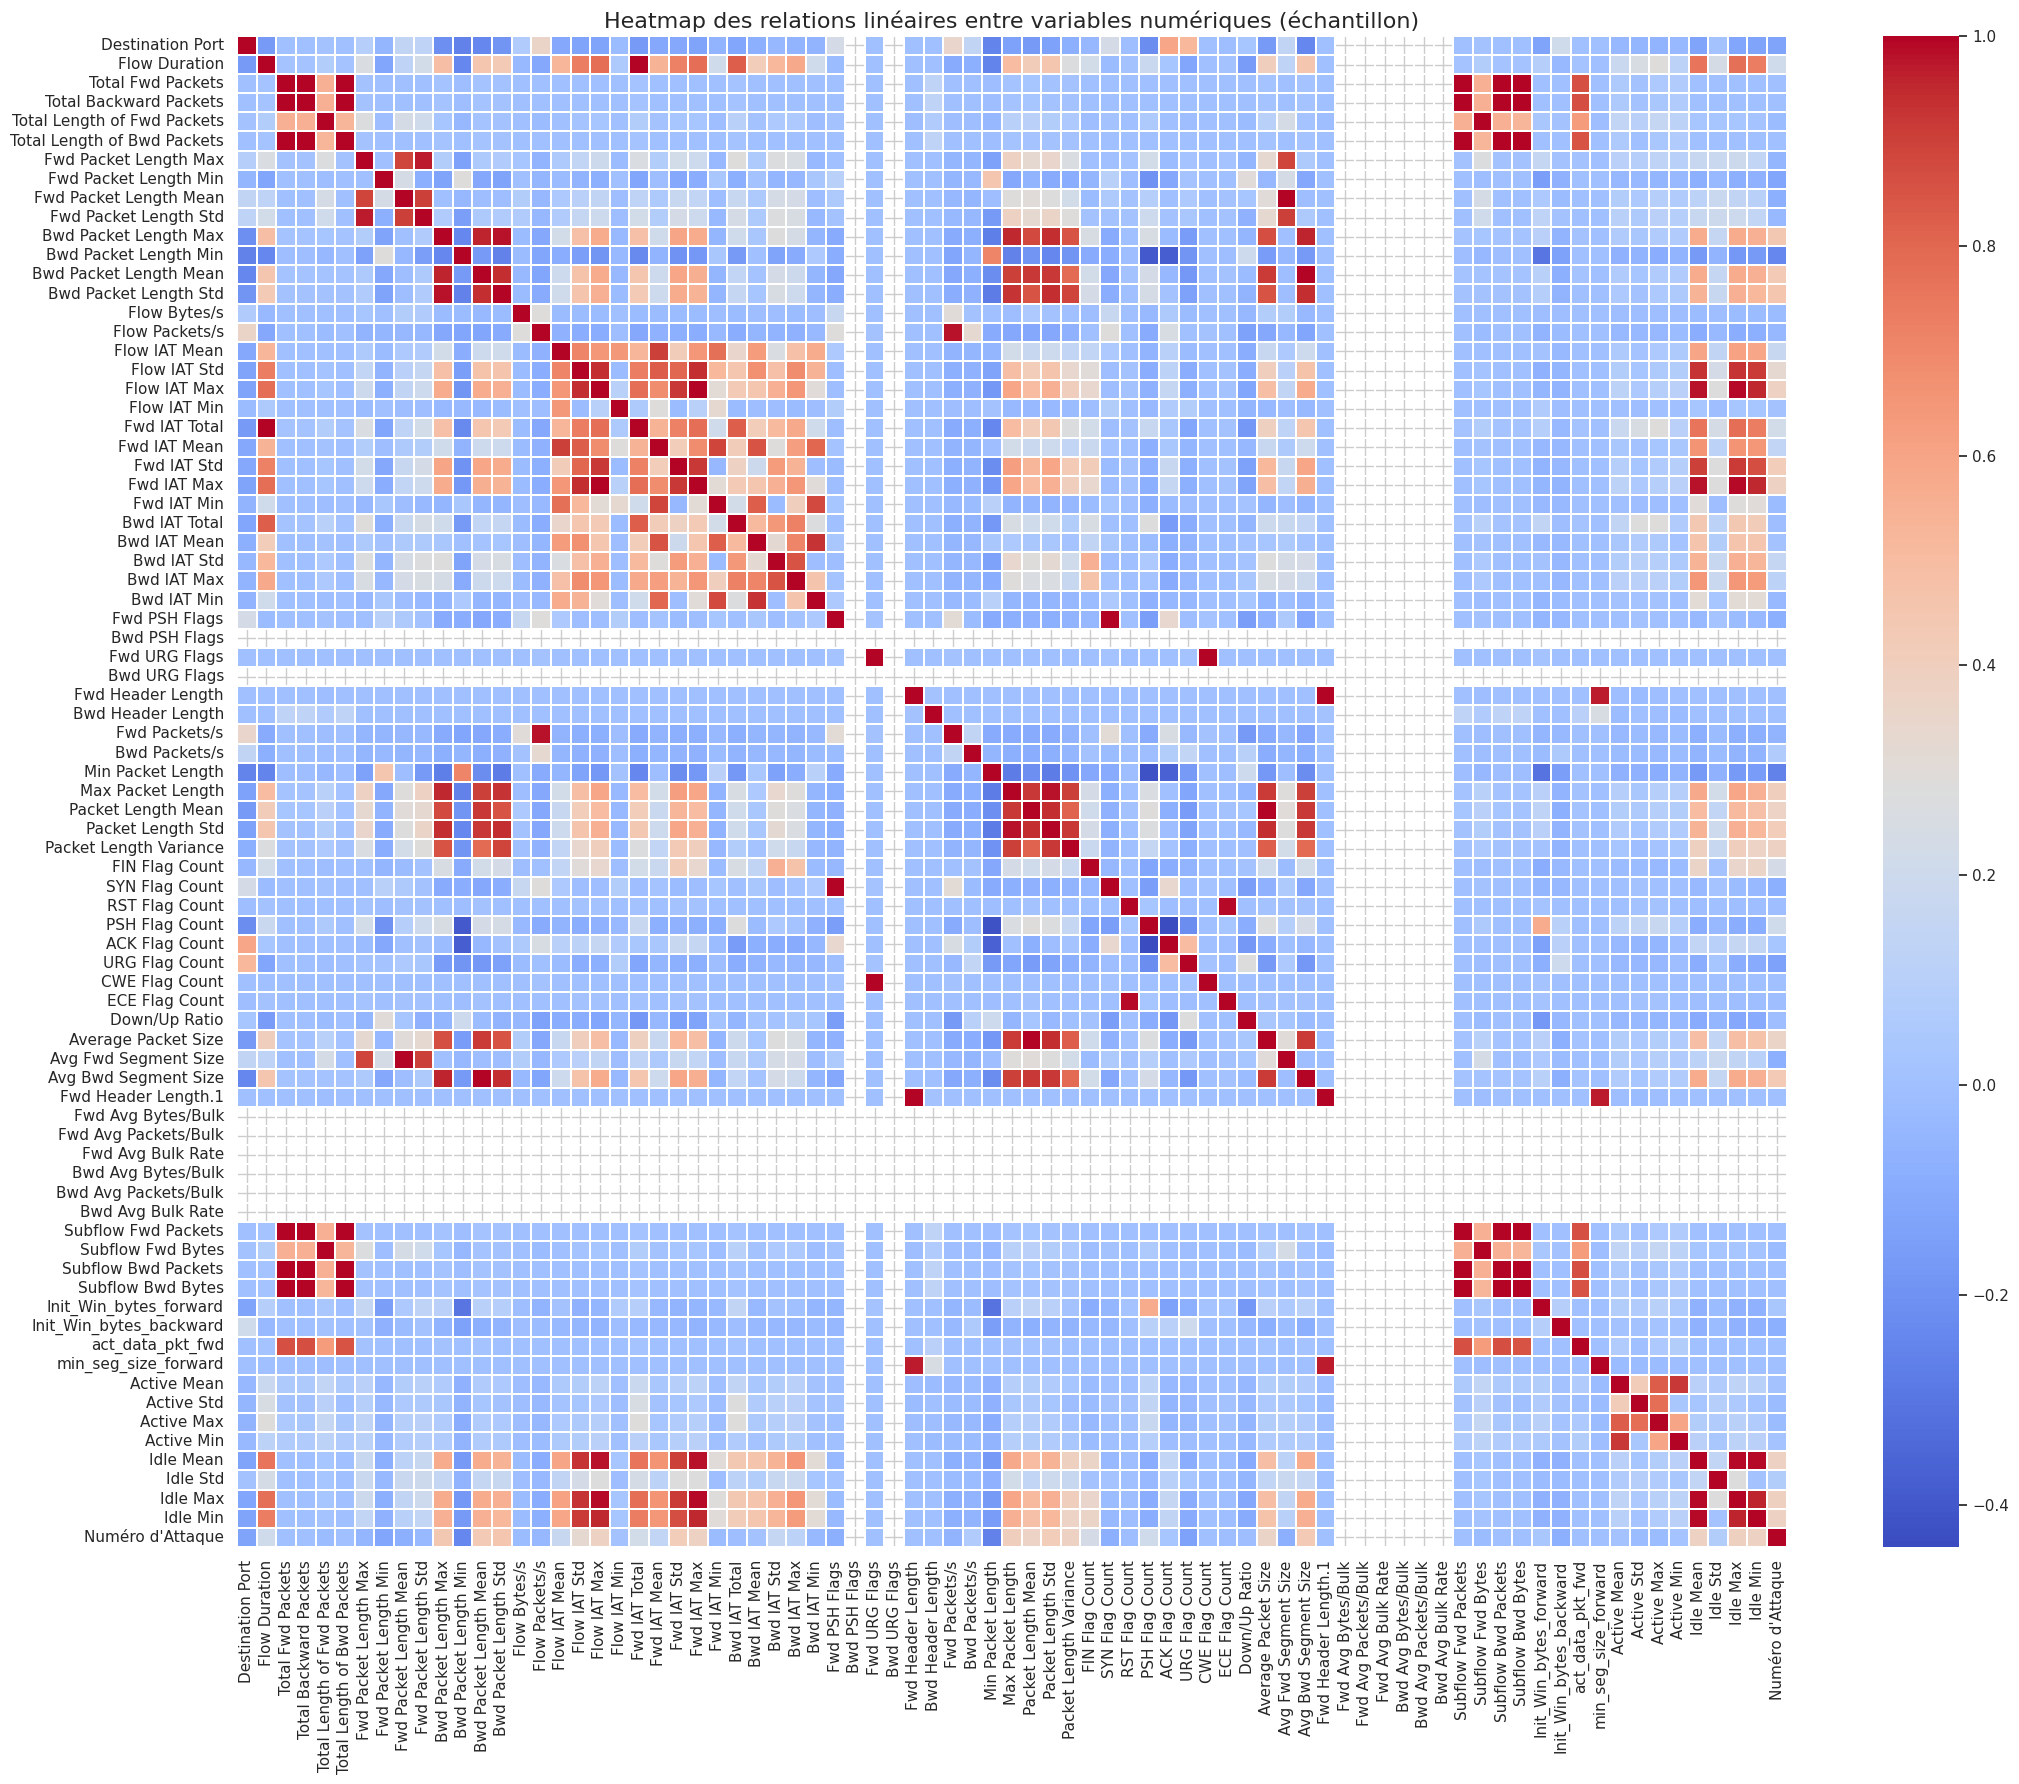

In [37]:
# Calcul de la matrice de corrélation sur les colonnes numériques de l'échantillon
corr_matrix = sampled_data.corr(numeric_only=True).round(2)

# Affichage de la heatmap avec Seaborn
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.3, cbar=True)
plt.title("Heatmap des relations linéaires entre variables numériques (échantillon)", fontsize=16)
plt.tight_layout()
plt.show()

In [38]:
# Suppression de la colonne 'Attack Number' si présente
for df in [df_total, sampled_data]:
    if 'Numéro d\'Attaque' in df.columns:
        df.drop('Numéro d\'Attaque', axis=1, inplace=True)

In [39]:
# Analyse des outliers (dataset échantillonné)
numeric_data = sampled_data.select_dtypes(include=['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier_mask = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier_mask.sum()
outlier_percentage = round(outlier_mask.mean() * 100, 2)

outlier_stats = pd.concat([outlier_count, outlier_percentage], axis=1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print("\nStatistiques des outliers par colonne :\n")
print(outlier_stats)


Statistiques des outliers par colonne :

                             Outlier Count  Outlier Percentage
Destination Port                    109264               21.66
Flow Duration                        94059               18.65
Total Fwd Packets                    50548               10.02
Total Backward Packets               47917                9.50
Total Length of Fwd Packets          62997               12.49
Total Length of Bwd Packets         114946               22.79
Fwd Packet Length Max                48745                9.66
Fwd Packet Length Min                 2611                0.52
Fwd Packet Length Mean               35787                7.09
Fwd Packet Length Std                47276                9.37
Bwd Packet Length Max                75002               14.87
Bwd Packet Length Min                13507                2.68
Bwd Packet Length Mean               87556               17.36
Bwd Packet Length Std                89801               17.80
Flow Bytes/s 

In [40]:
# Identification des valeurs aberrantes (outliers) selon le type d'attaque
outlier_counts = {}

for feature in numeric_data:
    for attack_type in sampled_data['Type d\'Attaque'].unique():
        attack_data = sampled_data[feature][sampled_data['Type d\'Attaque'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        borne_inf = q1 - 1.5 * iqr
        borne_sup = q3 + 1.5 * iqr
        nb_outliers = ((attack_data < borne_inf) | (attack_data > borne_sup)).sum()
        pourcentage_outliers = nb_outliers / len(attack_data) * 100
        outlier_counts[(feature, attack_type)] = (nb_outliers, pourcentage_outliers)

# Affichage des résultats sous forme de tableau dans la console
print(f"{'Feature':<30} {'Type dAttaque':<20} {'Outlier Count':<15} {'Outlier %':<10}")
print('-' * 75)

for feature in numeric_data:
    for attack_type in sampled_data['Type d\'Attaque'].unique():
        nb, pct = outlier_counts[(feature, attack_type)]
        print(f"{feature:<30} {attack_type:<20} {nb:<15} {pct:<10.2f}")

Feature                        Type dAttaque        Outlier Count   Outlier % 
---------------------------------------------------------------------------
Destination Port               BENIGN               93837           22.36     
Destination Port               DoS                  0               0.00      
Destination Port               DDoS                 0               0.00      
Destination Port               Port Scan            2209            12.25     
Destination Port               Brute Force          0               0.00      
Destination Port               Bot                  0               0.00      
Destination Port               Web Attack           0               0.00      
Destination Port               Infiltration         0               0.00      
Flow Duration                  BENIGN               97520           23.24     
Flow Duration                  DoS                  8490            21.85     
Flow Duration                  DDoS                 431

In [41]:
# Suppression de sampled_data
del sampled_data

# Appel à la collecte des objets inutilisés pour libérer la mémoire
import gc
gc.collect()

19967

Visualisation des relations entre les colonnes (variables catégorielles)

<ipython-input-42-f43bf84b2432>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Type d'Attaque", data=attaques, palette='pastel', order=attaques["Type d'Attaque"].value_counts().index)


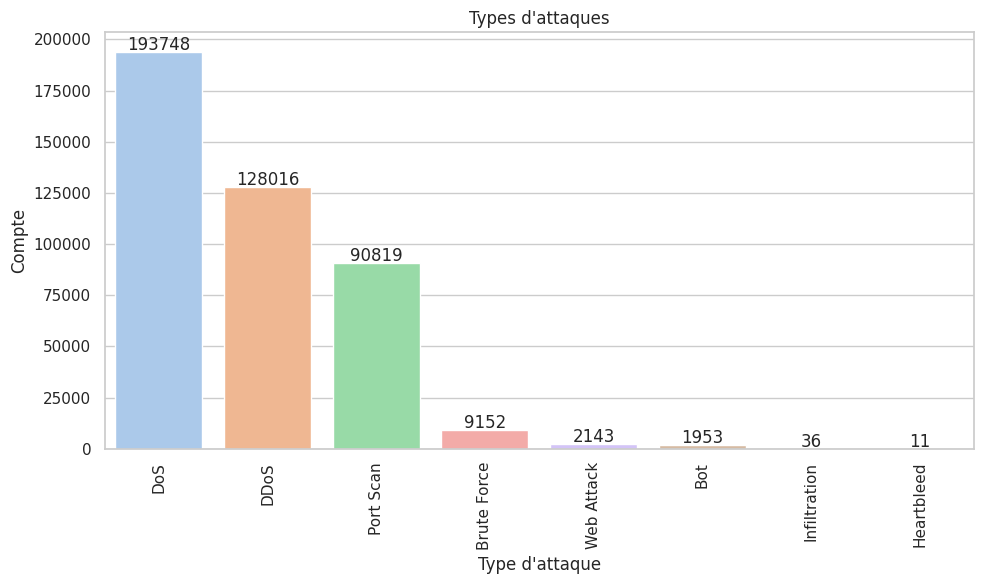

In [42]:
# Différents types d'attaques dans le jeu de données principal, à l'exclusion de 'BENIGN'
attaques = df_total.loc[df_total["Type d'Attaque"] != 'BENIGN']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Type d'Attaque", data=attaques, palette='pastel', order=attaques["Type d'Attaque"].value_counts().index)
plt.title("Types d'attaques")
plt.xlabel("Type d'attaque")
plt.ylabel("Compte")
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha='center')

plt.tight_layout()
plt.show()

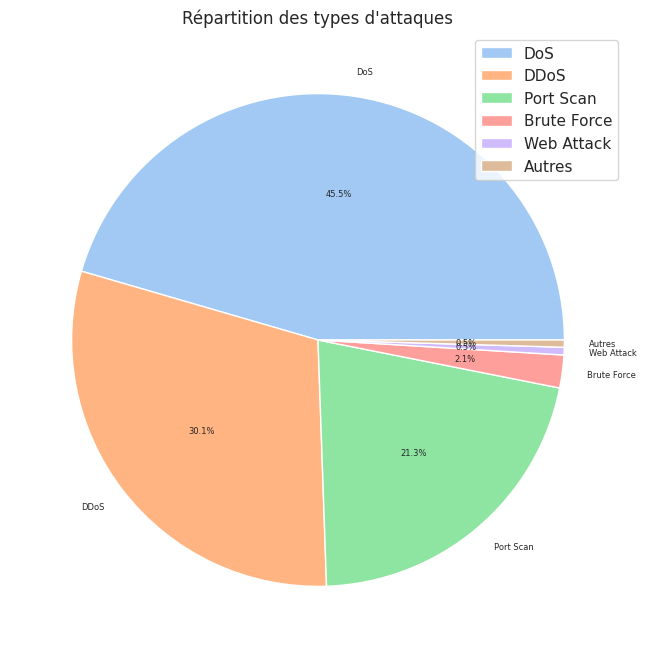

In [43]:
# Regrouper les types d'attaques rares sous l'étiquette "Autres"
compte_attaques = attaques["Type d'Attaque"].value_counts()
seuil = 0.005
pourcentages = compte_attaques / compte_attaques.sum()
petites_classes = pourcentages[pourcentages < seuil].index.tolist()

compte_attaques["Autres"] = compte_attaques[petites_classes].sum()
compte_attaques.drop(petites_classes, inplace=True)

sns.set_palette('pastel')
plt.figure(figsize=(8, 8))
plt.pie(compte_attaques.values, labels=compte_attaques.index, autopct='%1.1f%%', textprops={'fontsize': 6})
plt.title("Répartition des types d'attaques")
plt.legend(compte_attaques.index, loc='best')
plt.show()

In [44]:
df_total.groupby("Type d'Attaque").first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Type d'Attaque,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,...,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,...,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,...,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000,5024984,5024984
Infiltration,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,4,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Port Scan,80,5021059,6,5,703,1414,356,0,117.166667,181.536131,...,2,32,0.0,0.00000,0,0,0.0,0.00000,0,0
Web Attack,80,5185118,7,7,1022,2321,372,0,146.000000,184.078788,...,3,32,0.0,0.00000,0,0,0.0,0.00000,0,0


# **III. Data Preprocessing**

## **Prétraitement**

C'est une étape essentielle en science des données ou en apprentissage automatique, où les données brutes sont nettoyées, transformées ou mises en forme avant d'être utilisées pour l'analyse ou l'entraînement de modèles.

In [45]:
# Pour améliorer les performances et réduire les erreurs liées à la mémoire
ancienne_utilisation_memoire = df_total.memory_usage().sum() / 1024 ** 2
print(f'Utilisation mémoire initiale : {ancienne_utilisation_memoire:.2f} MB')

for col in df_total.columns:
    type_colonne = df_total[col].dtype
    if type_colonne != object:
        valeur_min = df_total[col].min()
        valeur_max = df_total[col].max()
        # Conversion de float64 vers float32
        if str(type_colonne).find('float') >= 0 and valeur_min > np.finfo(np.float32).min and valeur_max < np.finfo(np.float32).max:
            df_total[col] = df_total[col].astype(np.float32)

        # Conversion de int64 vers int32
        elif str(type_colonne).find('int') >= 0 and valeur_min > np.iinfo(np.int32).min and valeur_max < np.iinfo(np.int32).max:
            df_total[col] = df_total[col].astype(np.int32)

nouvelle_utilisation_memoire = df_total.memory_usage().sum() / 1024 ** 2
print(f"Utilisation mémoire finale : {nouvelle_utilisation_memoire:.2f} MB")

Utilisation mémoire initiale : 1539.53 MB
Utilisation mémoire finale : 808.25 MB


In [46]:
# Calcul du pourcentage de réduction de l'utilisation mémoire
print(f"Réduction de l'utilisation mémoire : {1 - (nouvelle_utilisation_memoire / ancienne_utilisation_memoire):.2%}")

Réduction de l'utilisation mémoire : 47.50%


In [47]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  Flow 

In [48]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522362.0,8.704762e+03,1.902507e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2522362.0,1.658132e+07,3.522426e+07,-1.300000e+01,208.000000,50577.000000,5.329717e+06,1.200000e+08
Total Fwd Packets,2522362.0,1.027627e+01,7.941738e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total Backward Packets,2522362.0,1.156596e+01,1.056594e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2522362.0,6.115751e+02,1.058499e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Total Length of Bwd Packets,2522362.0,1.813315e+04,2.397434e+06,0.000000e+00,6.000000,155.000000,9.880000e+02,6.554530e+08
Fwd Packet Length Max,2522362.0,2.310918e+02,7.561625e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd Packet Length Min,2522362.0,1.919464e+01,6.079447e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2522362.0,6.347011e+01,1.934055e+02,0.000000e+00,6.000000,36.111111,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2522362.0,7.727760e+01,2.900386e+02,0.000000e+00,0.000000,0.000000,7.413914e+01,7.125597e+03


In [49]:
# Suppression des colonnes avec une seule valeur unique
num_unique = df_total.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
df_total = df_total[not_one_variable]

print('Colonnes supprimées :')
dropped_cols

Colonnes supprimées :


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [50]:
df_total.shape

(2522362, 71)

In [51]:
df_total.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [52]:
features = [col for col in df_total.columns if col != "Type d'Attaque"]

print("Nombre de features :", len(features))
print("Exemple de features :", features[:5])

import json

with open("/content/drive/MyDrive/Colab Notebooks/ENSET's Project/features_list.json", "w") as f:
    json.dump(features, f)

Nombre de features : 70
Exemple de features : ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets']


- Afin d’optimiser les performances et de réduire les risques d’erreurs liées à la mémoire (notamment les plantages de session), nous avons converti certains types de données numériques (entiers et flottants) vers des formats plus légers, en tenant compte de leurs valeurs minimales et maximales. Cette opération nous a permis de réduire la consommation mémoire d’environ 47,5 %.

- Par ailleurs, certaines colonnes présentaient une déviation standard nulle, ce qui signifie qu’elles contiennent exactement la même valeur pour toutes les lignes. N’ayant aucune variance, ces colonnes sont inutiles pour distinguer ou analyser les différentes classes de données. Nous avons donc choisi de supprimer ces colonnes sans variation, car elles n’apportent aucune valeur ajoutée à l’analyse ou à l’entraînement d’un modèle.

Application de l'ACP pour réduire la dimensionnalité
(ACP = Analyse en Composantes Principales, ou PCA = Principal Component Analysis)

In [53]:
# Standardisation du jeu de données
from sklearn.preprocessing import StandardScaler

# Séparation des caractéristiques et de la cible
features = df_total.drop('Type d\'Attaque', axis=1)
attacks = df_total['Type d\'Attaque']

# Standardisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [54]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2

ipca = IncrementalPCA(n_components=size, batch_size=500)

for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information conservée : {sum(ipca.explained_variance_ratio_):.2%}')

information conservée : 99.23%


In [55]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Type d\'Attaque'] = attacks.values

In [56]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Type d'Attaque
0,-2.311094,-0.052684,0.515875,0.616537,3.840727,0.395336,-0.017878,0.186557,0.370079,-0.680438,...,-0.233945,0.699887,-0.539784,-0.035279,0.023075,0.001733,0.045647,0.151301,0.051935,BENIGN
1,-2.246553,-0.049159,0.467881,0.395550,2.001551,-0.141045,-0.016487,-0.780967,-0.889976,2.660582,...,-0.012903,0.543839,0.785574,0.212940,0.030939,0.001218,0.025860,0.009198,-0.058324,BENIGN
2,-2.258822,-0.049501,0.473634,0.408672,2.081408,-0.132962,-0.016754,-0.769681,-0.877466,2.634068,...,-0.020362,0.539934,0.780933,0.203564,0.034717,0.001194,0.025898,0.005914,-0.064384,BENIGN
3,-2.249188,-0.050635,0.467051,0.346824,2.013841,-0.106530,-0.016178,-0.745133,-0.840229,2.506786,...,-0.027380,0.175826,0.802770,0.063856,0.047573,0.001131,0.009281,0.018965,-0.033301,BENIGN
4,-2.311090,-0.052685,0.515877,0.616515,3.840698,0.395327,-0.017879,0.186543,0.370100,-0.680454,...,-0.233960,0.699809,-0.539762,-0.035319,0.023078,0.001733,0.045645,0.151311,0.051946,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-1.966993,-0.034823,0.214152,-0.550069,-0.715274,-0.255957,-0.028814,-0.395631,0.253441,-0.399620,...,-0.296905,-0.081193,0.269844,-0.117746,-0.025322,-0.000129,0.121039,-0.385284,-0.365042,BENIGN
2522358,-1.967205,-0.034920,0.140546,-0.769750,-1.329699,-1.050008,-0.084008,-0.676149,1.052839,-0.349890,...,0.177611,0.145811,0.015451,-0.222039,-0.507178,-0.003223,0.002393,-0.005697,-0.005829,BENIGN
2522359,-2.177556,-0.044307,0.882352,1.291548,4.455997,0.141248,-0.035232,0.677099,1.469905,-0.910787,...,-0.031176,1.551953,-0.121564,0.613116,0.076038,0.000554,0.116441,-0.021843,-0.250166,BENIGN
2522360,-1.906970,-0.035866,0.236786,-0.648835,-0.915041,-0.480387,-0.047541,-0.496969,0.535691,-0.471521,...,-0.168155,0.066397,0.364400,-0.251553,-0.355645,-0.001837,0.073125,-0.243405,-0.267952,BENIGN


# **IV. Les modèles de Machine Learning**

In [57]:
# Pour la validation croisée
from sklearn.model_selection import cross_val_score

## **Création d’un jeu de données équilibré pour la classification binaire :**
Nous savons qu’un jeu de données équilibré est crucial en apprentissage automatique car il permet de représenter chaque classe de manière équitable. Cela signifie que le nombre d’observations dans chaque classe est à peu près équivalent, ce qui évite que le modèle soit biaisé envers la classe majoritaire.
Un jeu de données biaisé peut entraîner de mauvaises performances du modèle, car celui-ci aura du mal à prédire les classes minoritaires.

Comme nous savons déjà que ce jeu de données est fortement déséquilibré, nous avons utilisé SMOTE (Synthetic Minority Over-sampling Technique) pour sur-échantillonner les classes minoritaires lors de la création d’un jeu de données équilibré pour la classification multiclasse. Cela nous a permis de produire un dataset globalement équilibré à fournir aux modèles de classification.

**Création d’un jeu de données équilibré pour la classification binaire**

In [58]:
normal_traffic = new_data.loc[new_data['Type d\'Attaque'] == 'BENIGN']
intrusions = new_data.loc[new_data['Type d\'Attaque'] != 'BENIGN']

# Échantillonnage aléatoire des connexions normales pour équilibrer avec les attaques
normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

# Concaténation et transformation en binaire (0 = normal, 1 = attaque)
ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Type d\'Attaque'] = np.where((ids_data['Type d\'Attaque'] == 'BENIGN'), 0, 1)

# Échantillon final de 15 000 lignes
bc_data = ids_data.sample(n = 15000)

print(bc_data['Type d\'Attaque'].value_counts())

Type d'Attaque
1    7527
0    7473
Name: count, dtype: int64


In [59]:
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Type d\'Attaque', axis = 1)
y_bc = bc_data['Type d\'Attaque']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

## **Régression Logistique (Classification binaire)**
La régression logistique est un modèle statistique utilisé pour prédire la probabilité d’un résultat binaire (oui/non, 0/1) à partir d’une ou plusieurs variables indépendantes.
Elle modélise la relation entre les variables indépendantes et la variable dépendante à l’aide d’une fonction sigmoïde, qui produit une valeur entre 0 et 1, interprétée comme une probabilité.

## **Paramètres principaux utilisés :**
- **max_iter :** Nombre maximal d’itérations pour que l’algorithme converge. Par défaut c’est 100, mais ici on l’a augmenté (10 000 et 15 000) car la convergence ne se faisait pas avec 100.

- **C :** Force de régularisation (inverse). Plus C est petit, plus la régularisation est forte, ce qui aide à éviter l’overfitting. Deux valeurs de C sont testées : 0.1 (forte régularisation) et 100 (faible régularisation).

- **solver :** Méthode d’optimisation utilisée (ici : 'saga' et 'sag', efficaces pour les grands datasets).

- **random_state :** Pour reproduire les mêmes résultats (fixe l’aléatoire).

**Modèle 1 - Forte régularisation (C = 0.1)**

In [60]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('====== Première modèle de régression logistique ======')
print(f'\nScores de validation croisée:', ', '.join(map(str, cv_lr1)))
print(f'\nScore moyen de validation croisée : {cv_lr1.mean():.2f}')

====== Première modèle de régression logistique ======

Scores de validation croisée: 0.9435555555555556, 0.9355555555555556, 0.9262222222222222, 0.9253333333333333, 0.9208888888888889

Score moyen de validation croisée : 0.93


In [61]:
print('====== Coefficients du première modèle de régression logistique ======')
print(*lr1.coef_, sep = ', ')
print('\nIntercept du première modèle de régression logistique :', *lr1.intercept_)

====== Coefficients du première modèle de régression logistique ======
[ 0.45466311 -0.22700385 -0.44481019 -2.25349311  0.60460679  0.98275601
  0.00594446  0.24266411  0.0144103   0.13587623 -0.01028372 -0.00740642
 -0.16103799  0.56840705  0.44090479  0.08236406 -0.01375078 -0.57689194
 -0.25896701  0.67794874 -0.40714767 -0.54214594  0.47765111  1.88981354
 -0.54867985 -1.23016914 -1.55607707 -0.29832943 -0.64420031  1.49551301
  0.15610488  0.01178766 -2.19826033  0.84040798  2.50947605]

Intercept du première modèle de régression logistique : -2.9030705110282167


In [62]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('====== Deuxième modèle de régression logistique ======')
print(f'\nScores de validation croisée:', ', '.join(map(str, cv_lr2)))
print(f'\nScore moyen de validation croisée : {cv_lr2.mean():.2f}')

====== Deuxième modèle de régression logistique ======

Scores de validation croisée: 0.9511111111111111, 0.9417777777777778, 0.9342222222222222, 0.9324444444444444, 0.9297777777777778

Score moyen de validation croisée : 0.94


In [63]:
print('====== Coefficients du deuxième modèle de régression logistique ======')
print(*lr2.coef_, sep = ', ')
print('\nIntercept du deuxième modèle de régression logistique :', *lr2.intercept_)

====== Coefficients du deuxième modèle de régression logistique ======
[ 0.61310991 -0.13917267 -0.70260745 -2.86689971  0.88125316  1.16136143
 -0.00750626  0.48389246  0.21114233  0.32201058  0.01746479 -0.02515342
 -0.12411438  1.93256852  0.96831863  0.15516338 -0.02980505 -0.94450916
 -0.52941991  0.82792075 -0.42256234 -0.67015685  0.45921803  2.20919381
 -1.05152075 -1.4174331  -2.44687373 -0.51039913 -0.84961663  2.46523328
 -0.05406952  0.01158021 -4.84442703 -0.6155072   4.24449969]

Intercept du deuxième modèle de régression logistique : -3.600601481696249


## **Support Vector Machine (SVM) - Classification Binaire**
Le Support Vector Machine (SVM) est un algorithme d'apprentissage supervisé utilisé pour la classification et l'analyse de régression. Il fonctionne en cherchant un hyperplan dans un espace à haute dimension qui sépare au mieux les points de données en différentes classes.

## **Paramètres clés :**
- **kernel :** Ce paramètre spécifie le type de fonction noyau utilisée. Ici, on a utilisé les noyaux poly (polynomial) et rbf (Radial Basis Function).

- **C :** Le paramètre C contrôle le compromis entre la maximisation de la marge (espace entre les différentes classes) et la minimisation de l'erreur de classification.

- **gamma :** Le paramètre gamma détermine l'influence d'un exemple d'entraînement sur la frontière de décision. Un gamma plus élevé signifie que chaque exemple individuel a une plus grande influence.

- **random_state :** Permet de garantir la reproductibilité des résultats en fixant l'aléatoire.


In [64]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('====== Première modèle de Machine à Vecteurs de Support ======')
print(f'\nScores de validation croisée:', ', '.join(map(str, cv_svm1)))
print(f'\nScore moyen de validation croisée : {cv_svm1.mean():.2f}')

====== Première modèle de Machine à Vecteurs de Support ======

Scores de validation croisée: 0.8684444444444445, 0.86, 0.8737777777777778, 0.8995555555555556, 0.8768888888888889

Score moyen de validation croisée : 0.88


In [65]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('====== Deucième modèle de Machine à Vecteurs de Support ======')
print(f'\nScores de validation croisée:', ', '.join(map(str, cv_svm2)))
print(f'\nScore moyen de validation croisée : {cv_svm2.mean():.2f}')

====== Deucième modèle de Machine à Vecteurs de Support ======

Scores de validation croisée: 0.972, 0.9666666666666667, 0.9622222222222222, 0.9595555555555556, 0.9573333333333334

Score moyen de validation croisée : 0.96


In [66]:
print('Intercept du première modèle SVM :', *svm1.intercept_)
print('Intercept du deuxième modèle SVM :', *svm2.intercept_)

Intercept du première modèle SVM : -0.6896818931540641
Intercept du deuxième modèle SVM : -0.41701071184218386


**Nous n'avons pas utilisé le noyau linéaire. Par conséquent, il n'y a pas de coefficients.**

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

models = {
    'Logistic Regression 1': lr1,
    'Logistic Regression 2': lr2,
    'SVM Poly': svm1,
    'SVM RBF': svm2
}

results = []

print("\n===== Évaluation des Modèles =====\n")

for name, model in models.items():
    y_pred = model.predict(X_test_bc)

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_bc)[:, 1]
    else:
        y_scores = model.decision_function(X_test_bc)

    accuracy = accuracy_score(y_test_bc, y_pred)
    precision = precision_score(y_test_bc, y_pred)
    recall = recall_score(y_test_bc, y_pred)
    f1 = f1_score(y_test_bc, y_pred)
    roc_auc = roc_auc_score(y_test_bc, y_scores)

    results.append((name, accuracy, precision, recall, f1, roc_auc))

    print(f"--- {name} ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(y_test_bc, y_pred))
    print("="*40)

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])
df_results = df_results.sort_values(by='Recall', ascending=False)

print("\n======= Résumé Comparatif =======\n")
print(df_results)

best_model_name = df_results.iloc[0]['Model']
print(f"\nLe meilleur modèle est : **{best_model_name}**")


===== Évaluation des Modèles =====

--- Logistic Regression 1 ---
Accuracy:  0.9243
Precision: 0.8989
Recall:    0.9542
F1-score:  0.9257
ROC AUC:   0.9773

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1896
           1       0.90      0.95      0.93      1854

    accuracy                           0.92      3750
   macro avg       0.93      0.92      0.92      3750
weighted avg       0.93      0.92      0.92      3750

--- Logistic Regression 2 ---
Accuracy:  0.9339
Precision: 0.9139
Recall:    0.9563
F1-score:  0.9346
ROC AUC:   0.9793

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1896
           1       0.91      0.96      0.93      1854

    accuracy                           0.93      3750
   macro avg       0.93      0.93      0.93      3750
weighted avg       0.93      0.93      0.93      3750

--- SVM Poly ---
Ac

## **Choix du Meilleur Modèle pour la Classification Binaire**
Après avoir entraîné et évalué quatre modèles de classification binaire (deux régressions logistiques et deux SVM avec noyaux différents), nous avons comparé leurs performances selon plusieurs métriques essentielles : accuracy, precision, recall, F1-score et ROC AUC.

Notre priorité étant de détecter les attaques (classe 1), la métrique la plus critique est le Recall. Un modèle avec un bon recall réduit les faux négatifs, c’est-à-dire les cas où une attaque n’est pas détectée. Dans un contexte de cybersécurité, rater une attaque est bien plus risqué que générer une fausse alerte, ce qui justifie pleinement ce choix.

Parmi les modèles testés, le SVM avec noyau RBF (SVM RBF) s’est démarqué avec un recall de 0.9859, le plus élevé de tous. Ce modèle combine également :

- **Une accuracy de 96.6 %,**

- **Une F1-score équilibrée de 0.9663,**

- **Un ROC AUC excellent de 0.9937, indiquant une très bonne capacité de discrimination.**

En comparaison, bien que les régressions logistiques aient obtenu de bons résultats, elles restent légèrement en retrait, notamment sur le rappel. Le modèle SVM avec noyau polynomial, quant à lui, affiche un très bon score de précision, mais un recall nettement plus faible, ce qui le disqualifie dans notre cas d’usage.

## **Exportation du Meilleur Modèle SVM (RBF) et de ses Composants pour Déploiement**

In [69]:
import joblib

# Créer le répertoire si besoin
export_dir = "/content/drive/MyDrive/Colab Notebooks/ENSET's Project/"
os.makedirs(export_dir, exist_ok=True)

# 1. Sauvegarder le modèle SVM RBF
joblib.dump(svm2, os.path.join(export_dir, "svm_rbf_model.joblib"))

# 2. Sauvegarder le scaler utilisé avant PCA (StandardScaler)
joblib.dump(scaler, os.path.join(export_dir, "scaler.joblib"))

# 3. Sauvegarder le modèle PCA utilisé
joblib.dump(ipca, os.path.join(export_dir, "ipca_model.joblib"))

# 4. Sauvegarder les performances dans un fichier texte
with open(os.path.join(export_dir, "model_performance.txt"), "w") as f:
    f.write("Best Model: SVM with RBF Kernel\n")
    f.write(f"Accuracy : {accuracy_score(y_test_bc, svm2.predict(X_test_bc)):.4f}\n")
    f.write(f"Precision: {precision_score(y_test_bc, svm2.predict(X_test_bc)):.4f}\n")
    f.write(f"Recall   : {recall_score(y_test_bc, svm2.predict(X_test_bc)):.4f}\n")
    f.write(f"F1 Score : {f1_score(y_test_bc, svm2.predict(X_test_bc)):.4f}\n")

print("====== Tous les fichiers ont été exportés avec succès. ======")

====== Tous les fichiers ont été exportés avec succès. ======
